In [0]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 23 13:20:15 2019

@author: chin-weihuang
"""


from __future__ import print_function
import numpy as np
import torch 
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
import samplers
import jsloss
from jsloss import Discriminator as Discriminator
from jsloss import JSD as JSD

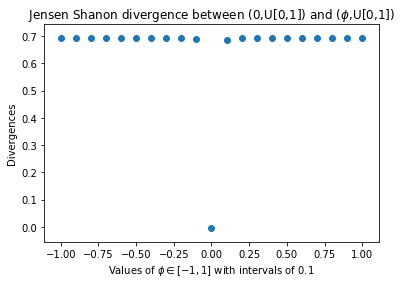

In [24]:
#Question 1.3
output_list = []

#loop over the values between -1 and 1 for (phi, U(0,1))
for phi in np.linspace(-1,1,21):
  jsd = JSD(x_val=phi, minibatch_size=512, epoch_count=500, learning_rate=1e-3, \
      input_size=2, hidden_size=10, output_size=1,  \
      real_sampler = samplers.distribution1, \
      fake_sampler = samplers.distribution1  \
      )
  output_list.append(jsd)
  
  
# wgan_output_list = []
# for phi in np.linspace(-1,1,21):
#   wgan_gp = wgan_gp(x_val=phi, minibatch_size=512, epoch_count=500, learning_rate=1e-3, \
#       input_size=2, hidden_size=10, output_size=1,  \
#       real_sampler = samplers.distribution1, \
#       fake_sampler = samplers.distribution1  \
#       )
#   wgan_output_list.append(wgan_gp)

torch.stack(output_list)
plt.figure()
plt.scatter(np.linspace(-1,1,21), \
            torch.stack(output_list).cpu().detach().numpy())

# plt.scatter(np.linspace(-1,1,21), \
#             torch.stack(output_list).cpu().detach().numpy())

plt.xlabel('Values of $\phi \in [-1,1]$ with intervals of 0.1 ' )
plt.ylabel('Divergences')
plt.title('Jensen Shanon divergence between (0,U[0,1]) and ($\phi$,U[0,1])')
plt.show()

In [0]:
#Question 1.4